### Lab Results

For each patient, get the number of lab results

In [32]:
import pandas as pd
import os
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "VCHAMPS"

In [68]:
dataset_path = 'lab_results_train.csv'
load_path = os.path.join(DATA_PATH, dataset_path)
lab = pd.read_csv(load_path, index_col=0)
lab

,Internalpatientid,Age at lab test,Lab test date,Lab test,Lab test description,Result numeric,Result textual,Result range,Result units,Specimen source,State
5,5166,79.946327,2015-12-10 09:11:04.0,troponin i (d/c'd 02/02/2014)_ng/ml_plasma,TROPONIN I (d/c'd 02/02/2014),0.020761,NaN,0.01 - 0.04,ng/ml,plasma,Texas
6,5166,81.160335,2017-02-26 02:27:18.0,calcium_mg/dl_plasma,calcium,9.759563,NaN,8.7 - 10.5,mg/dl,plasma,Texas
7,5166,81.160335,2017-02-26 02:27:18.0,sodium_mmol/l_plasma,SODIUM,130.000000,NaN,136 - 145,mmol/L,plasma,Texas
8,5166,81.160335,2017-02-26 02:27:18.0,creatinine_mg/dl_plasma,CREATININE,1.397398,NaN,0.6 - 1.3,mg/dl,plasma,Texas
9,5166,81.160335,2017-02-26 02:27:18.0,"protein,total_g/dl_plasma","PROTEIN,TOTAL",7.232604,NaN,6.2 - 8.0,g/dl,plasma,Texas
...,...,...,...,...,...,...,...,...,...,...,...
328853891,51662,53.534373,2012-05-07 19:31:20.0,mono #_k/cu mm_no specimen,MONO #,0.479895,NaN,.1 - 1,K/cu mm,NaN,Texas
328853892,51662,53.534373,2012-05-07 19:31:20.0,wbc_k/cu mm_blood,WBC,8.645974,NaN,4 - 11,K/cu mm,blood,Texas
328853893,51662,53.534373,2012-05-07 19:31:20.0,mch_pg_blood,MCH,29.000000,NaN,27 - 34,pg,blood,Texas
328853894,51662,53.534373,2012-05-07 19:31:20.0,rdw_%_blood,RDW,12.491520,NaN,11 - 16,%,blood,Texas


In [34]:
lab["Specimen source"].unique()

array(['plasma', nan, 'serum', 'blood', 'urine', 'venous blood',
       'capillary', 'nares', 'pharynx', 'feces', 'platelet poor plasma',
       'arterial blood', 'urine,24hr', 'whole blood', 'nasopharynx',
       'blood (unspun)', 'blood, venous', 'plasma+serum',
       'nasopharyngeal cavity', 'peritoneal fluid', 'ser/pla',
       'nasal cavity', 'urine-dau', 'urine, spot', 'plas',
       'capillary of skin', 'lc-pla', 'synovial fluid', 'lc-ser',
       'urine random', 'blood.', '24 hr. urine', 'unknown',
       '24-hour urine', 'plasma (buffered sodium citrate)', 'serum-unk',
       '24 hr urine', 'blood*', 'capillary blood', 'art blood', 'kidney',
       'serum-trough', 'see comment', '24hr urine', 'swab', 'serum-cx5',
       'arterial bld', 'cerebrospinal fluid', 'fluid, unspecified',
       'serum/i', 'blood lymphocyte', 'lung', 'blood-c', 'ws-serum',
       'pleural fluid', 'urine,timed', 'urine & blood', 'random urine',
       'mofh serum', 'pericardial fluid', 'throat', 'urine

In [35]:
lab["Lab test"].nunique()

24600

#### Get the number of lab tests

In [69]:
num_results = lab.groupby(['Internalpatientid']).size().to_frame().reset_index().rename(columns = {0:"count"})
num_results

,Internalpatientid,count
0,1,3052
1,2,6855
2,3,1718
3,4,1394
4,5,1338
...,...,...
130440,169060,4086
130441,169061,484
130442,169062,1925
130443,169063,252


In [70]:
num_results.to_csv("Number_lab_results.csv")

In [37]:
ad = pd.read_csv("inpatient_admission_complete.csv",index_col=0)
ad.columns

Index(['Internalpatientid', 'Age at admission', 'Admission date',
       'Discharge date', 'Admitting unit service', 'Discharging unit service',
       'Admitting specialty', 'Discharging specialty',
       'First listed discharge diagnosis icd10 subcategory',
       'Second listed discharge diagnosis icd10 subcategory',
       'Discharge disposition', 'Died during admission',
       'Outpatientreferralflag', 'Serviceconnectedflag', 'Agentorangeflag',
       'State', 'Cardiovascular', 'Readmission', 'MEDICINE', 'NHCU', 'OTHERS',
       'PSYCHIATRY', 'SURGERY', 'Age scaled'],
      dtype='object')

In [71]:
died_id = np.array(ad[ad['Died during admission'] == 1]['Internalpatientid'])
alive_id = np.array(ad[ad['Died during admission'] == 0]['Internalpatientid'])
readmitted_id = np.array(ad[ad['Readmission'] == 1]['Internalpatientid'])
noreadmitted_id = np.array(ad[ad['Readmission'] == 0]['Internalpatientid'])

Text(0.5, 1.0, 'Relationship of number of lab results with mortality')

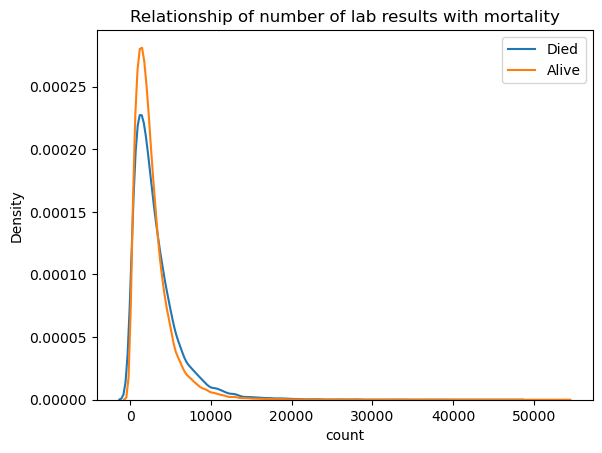

In [72]:
sns.kdeplot(num_results[num_results["Internalpatientid"].isin(died_id)]["count"], label="Died")
sns.kdeplot(num_results[num_results["Internalpatientid"].isin(alive_id)]["count"], label = "Alive")
plt.legend()
plt.title("Relationship of number of lab results with mortality")

Text(0.5, 1.0, 'Relationship of number of lab results with Readmission')

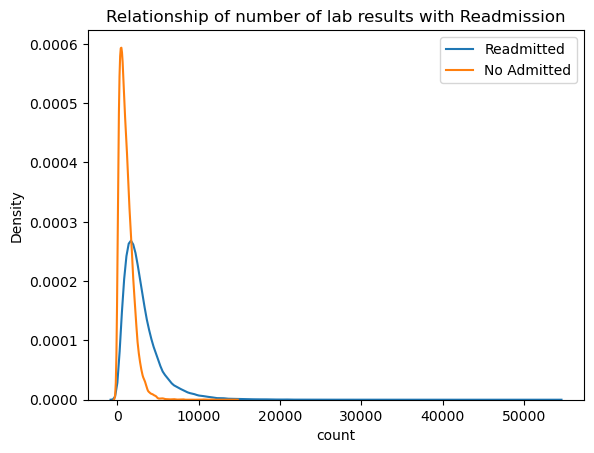

In [73]:
sns.kdeplot(num_results[num_results["Internalpatientid"].isin(readmitted_id)]["count"], label="Readmitted")
sns.kdeplot(num_results[num_results["Internalpatientid"].isin(noreadmitted_id)]["count"], label = "No Admitted")
plt.legend()
plt.title("Relationship of number of lab results with Readmission")

<Axes: >

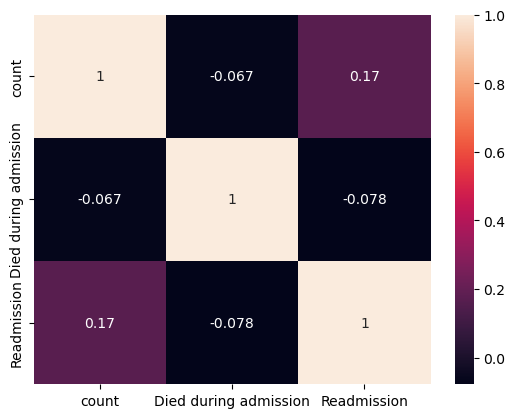

In [74]:
joined = ad.join(num_results.set_index('Internalpatientid'), on='Internalpatientid')
#temp[temp["count"].isna()]
sns.heatmap(joined[["count", "Died during admission", "Readmission"]].corr(), annot=True, fmt='.2g')

There are null values, remeber to remove those

In [77]:
len(joined[joined["count"].isna()])

35

Number of lab results has some correlation between readmission

should be used as a covariate